<a href="https://colab.research.google.com/github/NourHusam/shai-project/blob/main/Copy%201_of_ShAI_BootCamp_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
df= pd.read_csv("/content/Salaries.csv")
df.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148649,148650,Roy I Tillery,Custodian,0.0,0.0,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


# ***Task 1: Data Exploration***

In [5]:
df.shape

(148654, 13)

In [6]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [8]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [10]:
df.isnull().sum().sum()

334088

# ***Task 2 : Descriptive Statistics***

In [11]:
df["TotalPay"].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

In [14]:
print("mean of TotalPay = ",df["TotalPay"].mean())
print("mode of TotalPay = ", df["TotalPay"].mode())
print("min of TotalPay = ",df["TotalPay"].min())
print("max of TotalPay = ", df["TotalPay"].max())
print("std of TotalPay = ", df["TotalPay"].std())

mean of TotalPay =  74768.32197169267
mode of TotalPay =  0    0.0
Name: TotalPay, dtype: float64
min of TotalPay =  -618.13
max of TotalPay =  567595.43
std of TotalPay =  50517.00527394987


In [ ]:
TotalPay_range = df['TotalPay'].max() - df['TotalPay'].min()
TotalPay_range


568213.56

# **Task 3 : Data Cleaning**


In [ ]:

df['JobTitle'] = df['JobTitle'].str.upper()

In [ ]:
df = df[df['JobTitle'] != "Not provided"]

In [28]:

# Drop Notes, Status columns
df.drop(columns=['Notes', 'Status'], inplace=True)

KeyError: "['Notes', 'Status'] not found in axis"

In [29]:
df.isnull().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [31]:

null_basepay_rows = df[df['BasePay'].isnull()]

jobtitles_with_null_basepay = null_basepay_rows['JobTitle']

unique_jobtitles_with_null_basepay = jobtitles_with_null_basepay.unique()

filtered_df = df[df['JobTitle'].isin(unique_jobtitles_with_null_basepay)]

# Calculate the mean of 'BasePay' for each specific job title
mean_basepay_by_jobtitle = filtered_df.groupby('JobTitle')['BasePay'].mean()
# Replace the values in the original DataFrame with the calculated mean values
df.loc[df['JobTitle'].isin(unique_jobtitles_with_null_basepay), 'BasePay'] = df['JobTitle'].map(mean_basepay_by_jobtitle)

df['BasePay'].fillna(0, inplace=True)


In [ ]:
df['BasePay'].isnull().sum()

0

In [34]:
df["Benefits"]=df["Benefits"].fillna(value=0)

In [35]:
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         4
OtherPay            4
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

# **Task 4 :  Data Visualization**

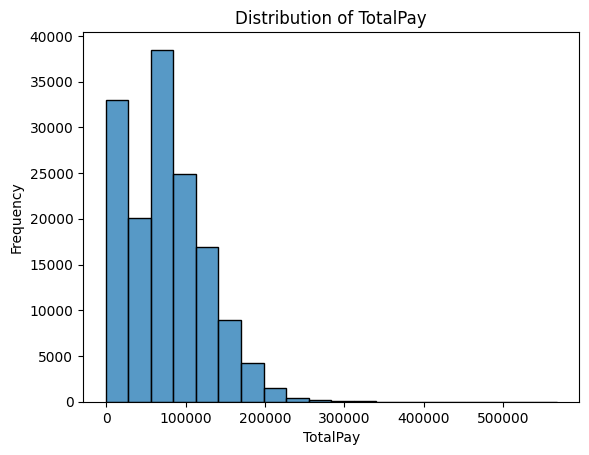

In [15]:
# visualize the distribution of salaries
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['TotalPay'], bins=20)
plt.title('Distribution of TotalPay')
plt.xlabel('TotalPay')
plt.ylabel('Frequency')
plt.show()

<ipython-input-24-6a72f7d6c75f>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all = top_10.append(pd.Series({'Other': Other}))


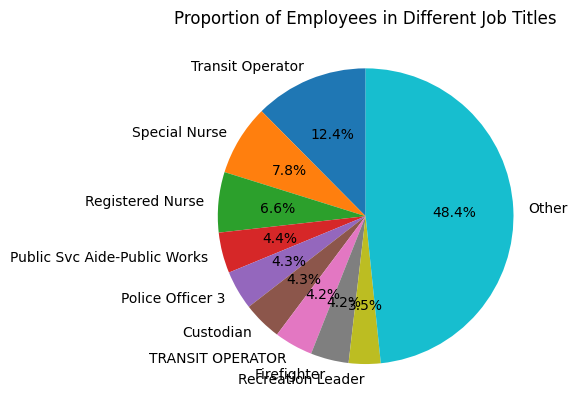

In [24]:
top_10 = df['JobTitle'].value_counts().nlargest(9)
Job_counts = df['JobTitle'].value_counts()
threshold = 70
Other = Job_counts[Job_counts < threshold].sum()
all = top_10.append(pd.Series({'Other': Other}))

plt.pie(all, labels=all.index, autopct='%1.1f%%', startangle=90)

plt.title('Proportion of Employees in Different Job Titles')
plt.show()

# **Tasks 5 :Grouped Analysis**

In [25]:
grouped_columns = [ 'Year','JobTitle']

# Calculate summary statistics for each group
grouped_data = df.groupby(grouped_columns)['TotalPay'].agg(['mean', 'count', 'min', 'max'])

grouped_data

mean  count        min  \
Year JobTitle                                                          
2011 ACCOUNT CLERK                    44035.664337     83     614.00   
     ACCOUNTANT                       47429.268000      5    1148.40   
     ACCOUNTANT INTERN                29031.742917     48    2981.53   
     ACUPUNCTURIST                    67594.400000      1   67594.40   
     ADMINISTRATIVE ANALYST           63954.867527     93    2388.24   
...                                            ...    ...        ...   
2014 Wire Rope Cable Maint Sprv      190575.900000      1  190575.90   
     Worker's Comp Supervisor 1       56689.446667      6      56.64   
     Worker's Compensation Adjuster   70636.455385     26    1837.39   
     X-Ray Laboratory Aide            51211.566857     35   11341.85   
     Youth Comm Advisor               36465.910000      1   36465.91   

                                           max  
Year JobTitle                                   
2011 ACCOUNT CLERK                    60838.20  
     ACCOUNTANT                       65392.01  
     ACCOUNTANT INTERN                58799.53  
     ACUPUNCTURIST                    67594.40  
     ADMINISTRATIVE ANALYST           79754.03  
...                                        ...  
2014 Wire Rope Cable Maint Sprv      190575.90  
     Worker's Comp Supervisor 1      108144.01  
     Worker's Compensation Adjuster  106050.66  
     X-Ray Laboratory Aide            99812.97  
     Youth Comm Advisor               36465.91  

[4137 rows x 4 columns]

# **Task 6 : Simple Correlation Analysis**

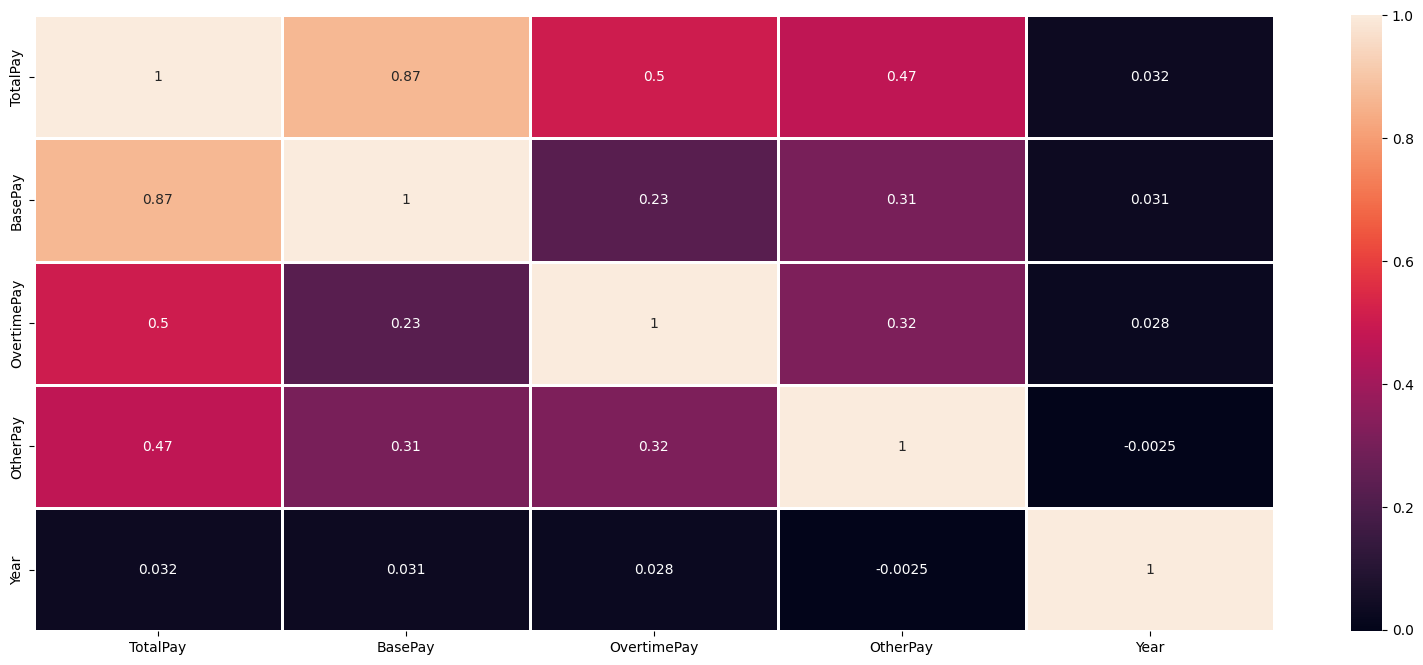

In [40]:
import seaborn as sns
plt.figure(figsize=(20,8))
corr=df[["TotalPay","BasePay", "OvertimePay", "OtherPay","Year"]].corr()
sns.heatmap(corr,annot=True,linewidth=1)

plt.show()

Correlation between 'TotalPay' and 'Year': 0.03209039798559024


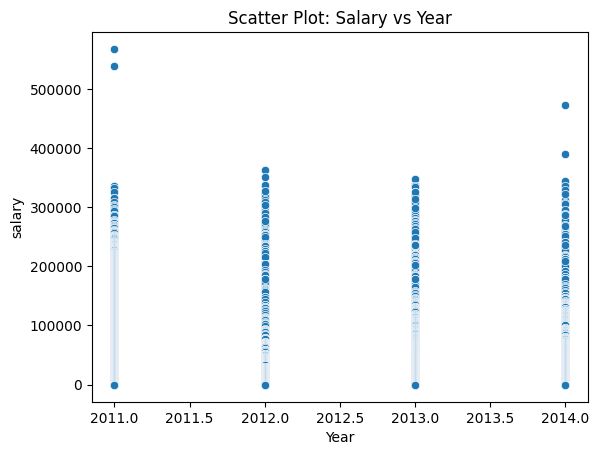

In [42]:
correlation_coefficient = df['TotalPay'].corr(df['Year'])
print(f"Correlation between 'TotalPay' and 'Year':" ,correlation_coefficient)
sns.scatterplot(x='Year', y='TotalPay', data=df)
plt.title(f'Scatter Plot: Salary vs Year')
plt.xlabel('Year')
plt.ylabel("salary")
plt.show()

# **Task 7 : Summary of Insights**

# 1. Basic Data Exploration:

The dataset comprises 148,654 rows and 13 columns.

Key columns include "Id," "EmployeeName," "JobTitle," "BasePay," "OvertimePay," "OtherPay," "Benefits," "TotalPay," "TotalPayBenefits," "Year," and "Agency."

Identified missing data in columns: "BasePay," "OvertimePay," "OtherPay," , "Benefits" ,"Notes", "Status"

# 2. Descriptive Statistics:

mean of TotalPay =  74768.32197169267

mode of TotalPay =  0    0.0

min of TotalPay =  -618.13

max of TotalPay =  567595.43

Range of salaries is approximately $568213.56

Standard deviation of totalpay is around $50,517.01,


# 3. Data Cleaning:

Deleted unnecessary columns "Notes" and "Status."
Addressed missing values in "BasePay" by replacing them with mean of 'BasePay' for each specific job title and "Benefits" by replacing them with zero.

# 4. Basic Data Visualization:

Plotted a histogram to visualize the distribution of total pay salaries.
Created a pie chart displaying the top 10 job titles with the category 'Other.'

# 5. Grouped Analysis:

Utilized the Groupby operation to calculate the average base pay for each job title across all years.

# 6. Simple Correlation Analysis:
used heat map to see the correlation between features

Identified a positive correlation between the coulmns "TotalPay","BasePay", "OvertimePay", "OtherPay","Year".

Totalpay tends to increase with higher values of other pays.

the correlation through a scatter plot depicting the relationship between totalpay and year, showing an increase in salaries over time.

